In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import jax
import jax.numpy as jnp
import blackjax
from blackjax.ns.utils import finalise
import tqdm 

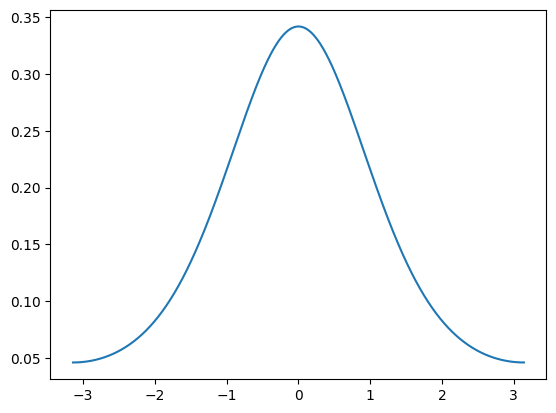

In [2]:
kappa = 1
mu = 0
dist = scipy.stats.vonmises(kappa, mu)
x = np.linspace(-np.pi, np.pi, 1000)
p = dist.pdf(x)
plt.plot(x, p);

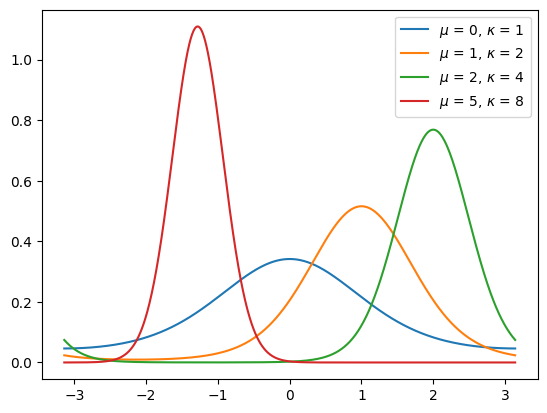

In [3]:
mu_ls = [0,1,2,5]
kappa_ls = [1,2,4,8]

for i in range(len(mu_ls)):
    mu = mu_ls[i]
    kappa = kappa_ls[i]
    dist = scipy.stats.vonmises(kappa, mu)
    x = np.linspace(-np.pi, np.pi, 1000)
    p = dist.pdf(x)
    plt.plot(x, p, label=rf'$\mu$ = {mu}, $\kappa$ = {kappa}')

plt.legend()

### Q 1.1.1: What happens when you set kappa very large?
Very strong peak around mu.

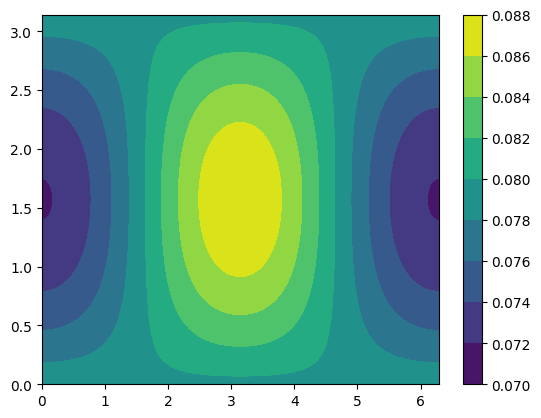

In [4]:
# Define the parameters of von-mises in terms of concentration kappa and mean direction (phi0, theta0)

def vmf_dist(kappa, phi, theta):
    mu = np.array([np.cos(phi)*np.sin(theta),
                   np.sin(phi)*np.sin(theta),
                   np.cos(theta)])
    return scipy.stats.vonmises_fisher(mu, kappa)

kappa = 0.1
phi0 = np.pi
theta0 = np.pi/2
dist = vmf_dist(kappa, phi0, theta0)

# Compute a meshgrid 
phi, theta = np.linspace(0, 2*np.pi, 100), np.arccos(np.linspace(1, -1, 100))
phi, theta = np.meshgrid(phi, theta)
x, y, z  = np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)

# Compute the pdf on the meshgrid with numpy broadcasting
x = np.stack([x, y, z], axis=2)
pdf = dist.pdf(x)
plt.contourf(phi, theta, pdf)
plt.colorbar();



### Exercise 1.2
Kappa changes the strength of the peaks in the distribution. For very large kappa, the peak centered on mu becomes increasingly narrow (smaller dot in mesh grid). For small kappa, the secondary off-mu peaks become more pronounced, and the ratio of the amplitudes of the secondary peaks vs. the central peak increases.

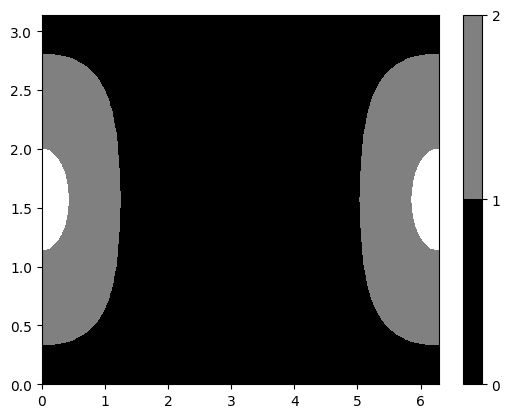

In [5]:
pdf = dist.pdf(x)
pdf = pdf.reshape(-1)
i = np.argsort(pdf)
cdf = pdf[i].cumsum()
cdf /= cdf[-1]
sigma = np.empty_like(pdf)
sigma[i] = np.sqrt(2) * scipy.special.erfinv(1-cdf)
sigma = sigma.reshape(phi.shape)
plt.contourf(phi, theta, sigma, levels=[0, 1, 2], colors=['black', 'gray'])
plt.colorbar();



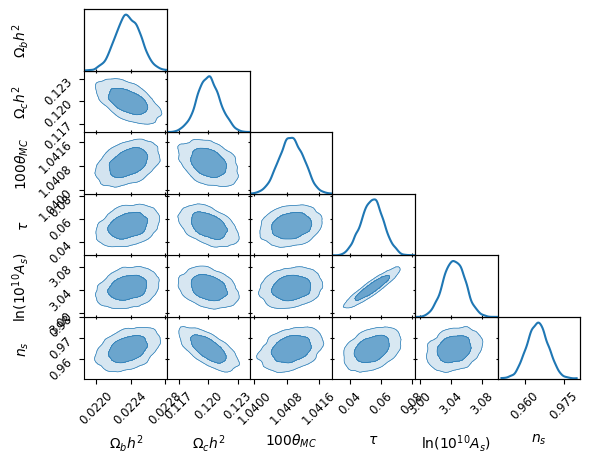

In [6]:
from anesthetic.examples.perfect_ns import planck_gaussian
params = ['omegabh2', 'omegach2', 'theta', 'tau', 'logA', 'ns']
planck_samples = planck_gaussian()[params].compress()
planck_samples.plot_2d(kind='kde');

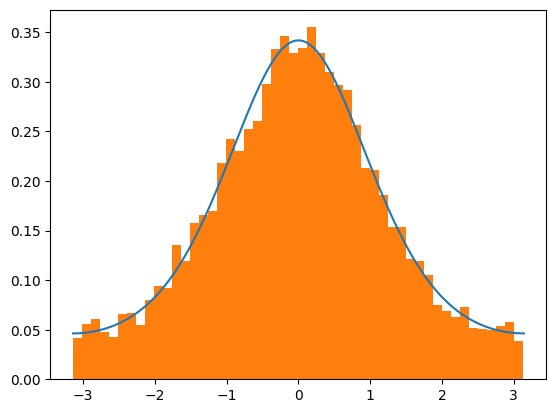

In [7]:
kappa = 1
mu = 0
dist = scipy.stats.vonmises(kappa, mu)
x = np.linspace(-np.pi, np.pi, 1000)
p = dist.pdf(x)
plt.plot(x, p);
samples = dist.rvs(10000)
plt.hist(samples, density=True, bins=50);


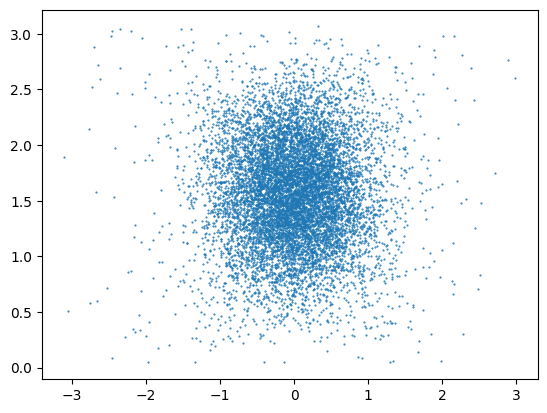

In [8]:
kappa = 4
phi0 = 0
theta0 = np.pi/2
dist = vmf_dist(kappa, phi0, theta0)
N = 10000
samples = dist.rvs(N)
theta, phi = np.arccos(samples[:,2]), np.arctan2(samples[:,1], samples[:,0])
plt.plot(phi, theta, '.', markersize=1);

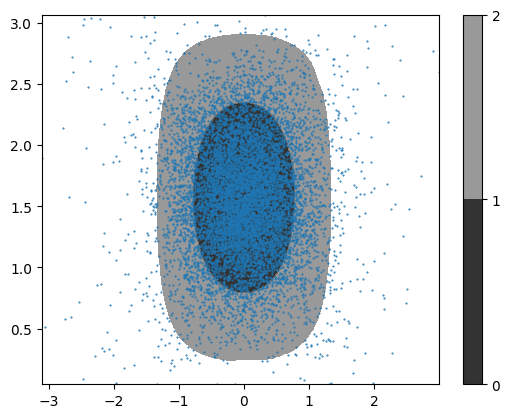

In [9]:
pdf = dist.pdf(samples)
i = np.argsort(pdf)
cdf = np.arange(1,N+1)/(N+1)
sigma = np.empty_like(pdf)
sigma[i] = np.sqrt(2) * scipy.special.erfinv(1-cdf)
plt.tricontourf(phi, theta, sigma, levels=[0, 1, 2], colors=['black', 'gray'], alpha=0.8)
plt.plot(phi, theta, '.', markersize=1)
plt.colorbar();



### Q 2.2.1: Why is the sigma calculation different in comparison to the previous example?

In the previous example, we were using grid points (uniform in prior), now we are using samples (uniform in posterior). Now, samples drawn from the distribution will populate its CDF uniformly.

THINK ABOUT AGAIN

In [10]:
planck_samples

,omegabh2,omegach2,theta,tau,logA,ns
labels,$\Omega_b h^2$,$\Omega_c h^2$,$100\theta_{MC}$,$\tau$,${\rm{ln}}(10^{10} A_s)$,$n_s$
18307,0.022104,0.120272,1.041437,0.055861,3.062677,0.958497
18347,0.022627,0.120220,1.040827,0.040717,3.030469,0.972471
18353,0.021900,0.123395,1.041009,0.060511,3.061861,0.953517
18400,0.022464,0.118474,1.040724,0.052916,3.022247,0.977868
18457,0.022258,0.117258,1.040489,0.067284,3.072619,0.974615
...,...,...,...,...,...,...
27463,0.022398,0.120023,1.040959,0.054708,3.046232,0.966220
27540,0.022373,0.119951,1.040995,0.057070,3.050753,0.965460
27688,0.022430,0.119708,1.040990,0.054944,3.046032,0.966363


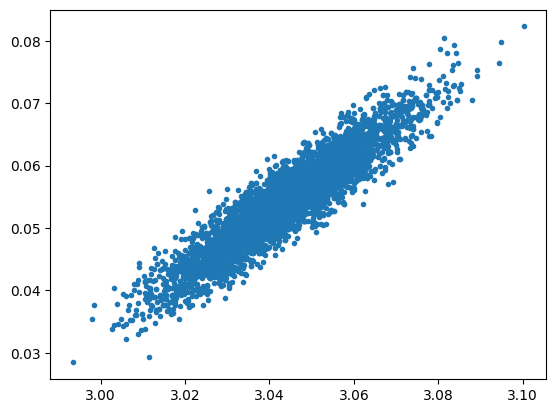

In [11]:
plt.plot(*planck_samples[['logA', 'tau']].to_numpy().T, '.');

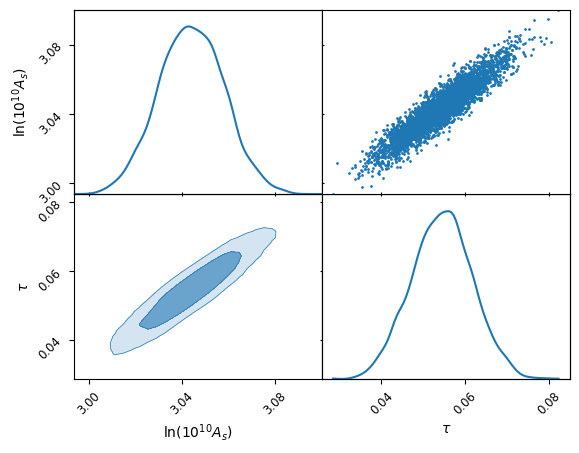

In [12]:
planck_samples[['logA', 'tau']].plot_2d();


### Exercise 2.4

In [13]:
x = np.random.normal(0,1,10000)

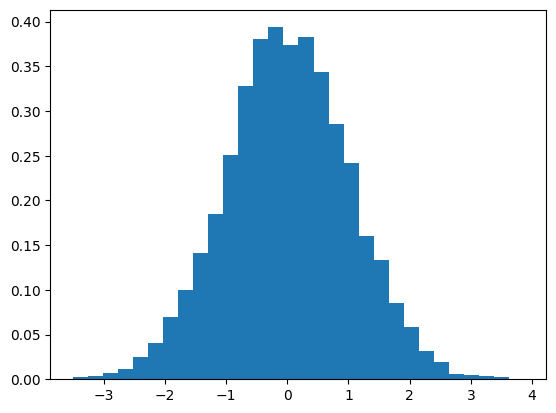

In [14]:
plt.hist(x, bins=30, density=True)
plt.show()

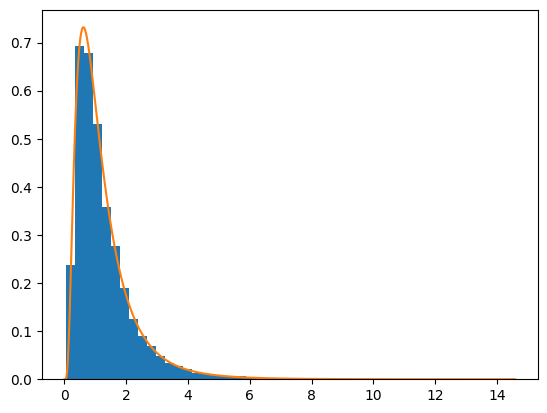

In [15]:
x = scipy.stats.norm().rvs(10000)

def f(x):
    return 2**x

plt.hist(f(x), bins=50, density=True)
x_ = np.linspace(0, f(x).max(), 1000)
s = np.log(2)
plt.plot(x_, scipy.stats.lognorm(s).pdf(x_))

In [16]:
from anesthetic import Samples

x = np.random.rand(100,3)
w = np.random.rand(100)
samples = Samples(x, weights=w)
samples

,,0,1,2
,weights,,,
0,0.212692,0.091963,0.253287,0.860456
1,0.327883,0.620225,0.094379,0.203405
2,0.725027,0.652421,0.550623,0.139206
3,0.547255,0.069112,0.298210,0.049564
4,0.075589,0.319146,0.687113,0.715401
...,...,...,...,...
95,0.887717,0.526406,0.038312,0.811735
96,0.856132,0.118567,0.268435,0.894201
97,0.358953,0.672365,0.033775,0.735729


In [17]:
samples.mean()

0    0.471170
1    0.460317
2    0.464033
dtype: float64

In [18]:
samples.std()

0    0.286920
1    0.284328
2    0.288220
dtype: float64

In [19]:
print(np.mean(x, axis=0) - samples.mean())
print(np.std(x, axis=0) - samples.std())

0   -0.000698
1    0.010070
2   -0.001152
dtype: float64
0   -0.017884
1    0.004492
2   -0.002017
dtype: float64


### Q 2.6: What statistical operation can you not easily get from samples?

Evidence? Integral of the likelihood (Data | theta, M) * prior (theta | M) over the *entire* parameter space.

In [20]:
from examples import planck

In [21]:
type(planck.prior)

scipy.stats._distn_infrastructure.rv_continuous_frozen

## Quickstart

In [22]:
import jax
import jax.numpy as jnp
import blackjax
from blackjax.ns.utils import finalise
import tqdm 

rng_key = jax.random.PRNGKey(0) # initializes JAX random key to ensure reproducible random number generation

loglikelihood_fn = lambda x: jax.scipy.stats.multivariate_normal.logpdf(x, jnp.ones(5), jnp.eye(5)*0.01)
# log-likelihood: data is best explained with all five params (x) close to one (mean = jnp.ones(5)) with low std (jnp.eye(5)*0.01 : 2D array where all elements are 0 except the k-th diagonal)
logprior_fn = lambda x : jax.scipy.stats.multivariate_normal.logpdf(x, jnp.zeros(5), jnp.eye(5))
# logprior_fn: PRIOR information, still multivariate gauss dist., but with a much broader std (by factor 100)

algo = blackjax.nss( # Uses slice sampling (nss)
    logprior_fn=logprior_fn,
    loglikelihood_fn=loglikelihood_fn,
    num_delete=50, # number of live points to be deleted in each iteration
    num_inner_steps=20, # number of steps to find a replacement point with Loglike > Loglike_delete (the min. from before)
)

rng_key, sampling_key, initialization_key = jax.random.split(rng_key, 3)
live = algo.init(jax.random.normal(initialization_key, (1000, 5))) # initialize algorithm with n=1000 live points drawn from prior (5D Gaussian)
step = jax.jit(algo.step) # compiling nested sampling step function (algo) in accelerated loop

dead_points = []

with tqdm.tqdm(desc="Dead points", unit=" dead points") as pbar:
    while (not live.logZ_live - live.logZ < -3): # log10(remaining mass/total mass) < 10**-3 (0.1%)
        rng_key, subkey = jax.random.split(rng_key)
        live, dead = step(subkey, live)
        dead_points.append(dead)
        pbar.update(len(dead.particles))

ns_run = finalise(live, dead_points)

Dead points: 16400 dead points [00:07, 2318.45 dead points/s]


In [23]:
import anesthetic
import numpy as np

nested_samples = anesthetic.NestedSamples(
    data = ns_run.particles,
    logL = ns_run.loglikelihood,
    logL_birth = ns_run.loglikelihood_birth,
)

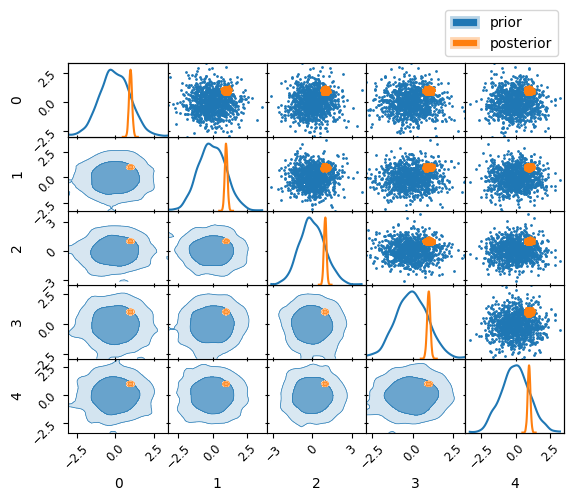

In [24]:
prior = nested_samples.set_beta(0.0).plot_2d(np.arange(5), label="prior")
post = nested_samples.plot_2d(prior, label= "posterior")
prior.iloc[-1, 0].legend(bbox_to_anchor=(len(prior), len(prior)), loc='lower right')

## Walkthrough

In [25]:
import jax
import jax.numpy as jnp
import tqdm

import blackjax

rng_key = jax.random.PRNGKey(0)

d = 20 # 20D problem

C = jax.random.normal(rng_key, (d, d)) * 0.1 # (d, d) shape
like_cov = C @ C.T # covariances
like_mean = jax.random.normal(rng_key, (d,)) # means

# Priors (means=0, covs=1)
prior_mean = jnp.zeros(d)
prior_cov = jnp.eye(d) * 1

In [26]:
# (Log) prior density
logprior_density = lambda x: jax.scipy.stats.multivariate_normal.logpdf(
    x, prior_mean, prior_cov
)

# (Log) likelihood
loglikelihood_function = lambda x: jax.scipy.stats.multivariate_normal.logpdf(
    x, like_mean, like_cov
)

# Initial population of particles drawn from the prior (stays fixed throughout run)
rng_key, prior_sample_key = jax.random.split(rng_key)
n_live = 1000 # size of initial prior population
initial_population = jax.random.multivariate_normal(
    prior_sample_key, prior_mean, prior_cov, (n_live,)
)

### Algorithm params

n_live: number of non-discarded points (highest likelihood)

num_inner_steps: length of short Markov chains used to update the population, typically set to some multiple of the dimension of the parameter space (start with 3*d).

num_delete: some integer, how many cahins to vectorize over, setting this to ~10% of n_live is good for CPU usage, up to 50% for GPU.

In [27]:
num_inner_steps = 3 * d
num_delete = int(n_live*0.1)

algo = blackjax.nss(
    logprior_fn=logprior_density,
    loglikelihood_fn=loglikelihood_function,
    num_delete=num_delete,
    num_inner_steps=num_inner_steps,
)

state = algo.init(initial_population)

In [28]:
from blackjax.ns.base import NSState
print(f"{NSState.__doc__}")

State of the Nested Sampler.

    Attributes
    ----------
    particles
        A PyTree of arrays, where each leaf array has a leading dimension
        equal to the number of live particles. Stores the current positions of
        the live particles.
    loglikelihood
        An array of log-likelihood values, one for each live particle.
    loglikelihood_birth
        An array storing the log-likelihood threshold that each current live
        particle was required to exceed when it was "born" (i.e., sampled).
        This is used for reconstructing the nested sampling path.
    logprior
        An array of log-prior values, one for each live particle.
    pid
        Particle ID. An array of integers tracking the identity or lineage of
        particles, primarily for diagnostic purposes.
    logX
        The log of the current prior volume estimate.
    logZ
        The accumulated log evidence estimate from the "dead" points .
    logZ_live
        The current estimate of the l

## Best Practices


In [29]:
from blackjax.ns.base import NSInfo
print(f"{NSInfo.__doc__}")

Additional information returned at each step of the Nested Sampling algorithm.

    Attributes
    ----------
    particles
        The PyTree of particles that were marked as "dead" (replaced) in the
        current step.
    loglikelihood
        The log-likelihood values of the dead particles.
    loglikelihood_birth
        The birth log-likelihood thresholds of the dead particles.
    logprior
        The log-prior values of the dead particles.
    inner_kernel_info
        A NamedTuple (or any PyTree) containing information from the update step
        (inner kernel) used to generate new live particles. The content
        depends on the specific inner kernel used.
    


In [30]:
@jax.jit
def one_step(carry, xs):
    state, k = carry
    k, subk = jax.random.split(k, 2)
    state, dead_point = algo.step(subk, state)
    return (state, k), dead_point

### A nested sampling run / check exit condition

In [31]:
dead = []

with tqdm.tqdm(desc="Dead points", unit=" dead points") as pbar:
    while not state.logZ_live - state.logZ < -3:
        (state, rng_key), dead_info = one_step((state, rng_key), None)
        dead.append(dead_info)
        pbar.update(num_delete)

Dead points: 35400 dead points [00:46, 763.78 dead points/s] 


In [32]:
from blackjax.ns.utils import log_weights, finalise, sample, ess

rng_key, weight_key, sample_key = jax.random.split(rng_key,3)
final_state = finalise(state,dead)
log_w = log_weights(weight_key, final_state, shape=100)
samples = sample(sample_key, final_state, shape = n_live)
ns_ess = ess(sample_key, final_state)

logzs = jax.scipy.special.logsumexp(log_w, axis=0)

In [33]:
from jax.scipy.linalg import solve_triangular, cho_solve

def compute_logZ(mu_L, Sigma_L, logLmax=0, mu_pi=None, Sigma_pi=None):
    """
    Compute log evidence, posterior covariance, and posterior mean.
    
    Args:
        mu_L: Likelihood mean
        Sigma_L: Likelihood covariance
        logLmax: Maximum log likelihood value
        mu_pi: Prior mean
        Sigma_pi: Prior covariance
    
    Returns:
        Tuple of (log evidence, posterior covariance, posterior mean)
    """
    # Use Cholesky decomposition for more stable calculations
    L_pi = jnp.linalg.cholesky(Sigma_pi)
    L_L = jnp.linalg.cholesky(Sigma_L)
    
    # Compute precision matrices (inverse covariances)
    prec_pi = cho_solve((L_pi, True), jnp.eye(L_pi.shape[0]))
    prec_L = cho_solve((L_L, True), jnp.eye(L_L.shape[0]))
    
    # Compute posterior precision and its Cholesky factor
    prec_P = prec_pi + prec_L
    L_P = jnp.linalg.cholesky(prec_P)
    
    # Compute Sigma_P using Cholesky factor
    Sigma_P = cho_solve((L_P, True), jnp.eye(L_P.shape[0]))
    
    # Compute mu_P more stably
    b = cho_solve((L_pi, True), mu_pi) + cho_solve((L_L, True), mu_L)
    mu_P = cho_solve((L_P, True), b)
    
    # Compute log determinants using Cholesky factors
    logdet_Sigma_P = -2 * jnp.sum(jnp.log(jnp.diag(L_P)))
    logdet_Sigma_pi = 2 * jnp.sum(jnp.log(jnp.diag(L_pi)))
    
    # Compute quadratic forms using Cholesky factors
    diff_pi = mu_P - mu_pi
    diff_L = mu_P - mu_L
    quad_pi = jnp.sum(jnp.square(solve_triangular(L_pi, diff_pi, lower=True)))
    quad_L = jnp.sum(jnp.square(solve_triangular(L_L, diff_L, lower=True)))
    
    return (
        (
            logLmax
            + logdet_Sigma_P / 2
            - logdet_Sigma_pi / 2
            - quad_pi / 2
            - quad_L / 2
        ),
        Sigma_P,
        mu_P,
    )

log_analytic_evidence, post_cov, post_mean = compute_logZ(
    like_mean,
    like_cov,
    mu_pi=prior_mean,
    Sigma_pi=prior_cov,
    logLmax=loglikelihood_function(like_mean),
)

In [34]:
print(f"ESS: {int(ns_ess)}")
print(f"logZ estimate: {logzs.mean():.2f} +- {logzs.std():.2f}")
print(f"analytic logZ: {log_analytic_evidence:.2f}")

ESS: 10271
logZ estimate: -31.84 +- 0.17
analytic logZ: -32.09


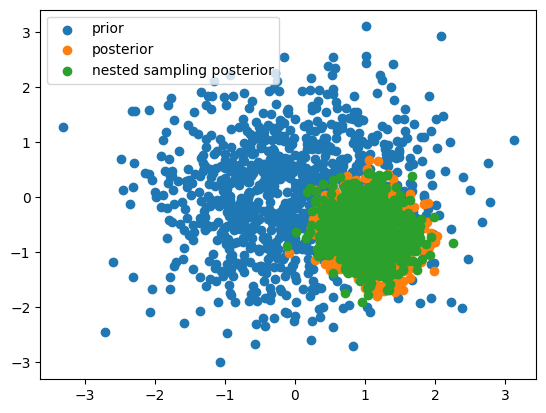

In [35]:
import matplotlib.pyplot as plt

posterior_truth = jax.random.multivariate_normal(
    rng_key, post_mean, post_cov, (n_live,)
)

plt.scatter(
    initial_population[..., 0], initial_population[..., 1], label="prior"
)
plt.scatter(
    posterior_truth[..., 0], posterior_truth[..., 1], label="posterior"
)
plt.scatter(
    samples[..., 0], samples[..., 1], label="nested sampling posterior"
)
plt.legend()

## Best practices

In [36]:
import jax
import jax.numpy as jnp
import tqdm
import blackjax

In [37]:
jax.config.update("jax_enable_x64", True)

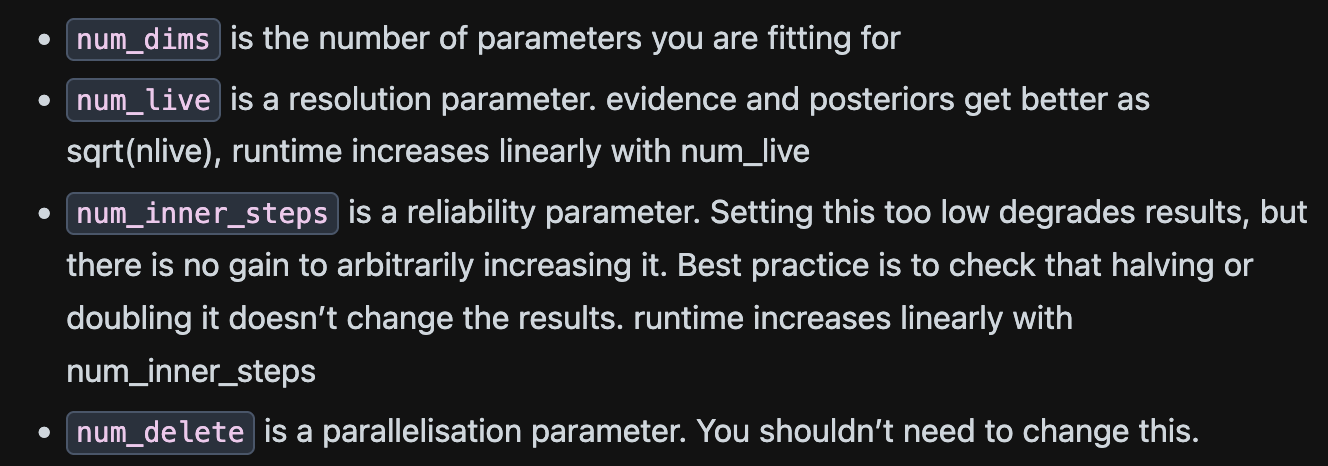

In [38]:
rng_key = jax.random.PRNGKey(0)
num_dims = 3
num_live = 1000
num_inner_steps = num_dims * 5
num_delete = num_live // 2

## Fitting a $y=mx+c$ model to data

In [39]:
num_data = 10
xmin, xmax = -1.0, 1.0
x = jnp.linspace(xmin, xmax, num_data)
m = 2.0
c = 1.0
sigma = 1
key, rng_key = jax.random.split(rng_key)
noise = sigma * jax.random.normal(key, (num_data,)) 
y = m * x + c + noise

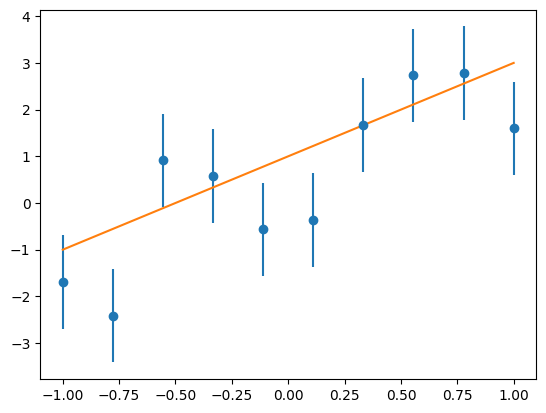

In [40]:
plt.errorbar(x, y, yerr=sigma, fmt="o", label="data")
plt.plot(x, m * x + c, label="true model");

In [41]:
# Multivariate normal dist. to define the likelihood function, which is normal to the data

def loglikelihood_fn(params):
    m = params["m"]
    c = params["c"]
    sigma = params["sigma"]
    cov = sigma ** 2
    return jax.scipy.stats.multivariate_normal.logpdf(y, m * x + c, cov)

In [42]:
# Define the prior function

prior_bounds = {
        "m": (-5.0, 5.0),
        "c": (-5.0, 5.0),
        "sigma": (0.0, 10.0),
        }

rng_key, prior_key = jax.random.split(rng_key)
# particles, logprior_fn = blackjax.ns.utils.uniform_prior(prior_key, num_live, prior_bounds)
def logprior_fn(x):
        # return jax.scipy.stats.multivariate_normal.logpdf(x, jnp.zeros(3), jnp.eye(3))
        return jax.scipy.stats.norm.logpdf(x["m"]) + jax.scipy.stats.norm.logpdf(x["c"]) + jax.scipy.stats.norm.logpdf(x["sigma"])


# particles = algo.init(jax.random.normal(initialization_key, (1000, 3)))

def prior_sample(rng_key):
        init_keys = jax.random.split(rng_key, 3)
        params = {}
        for rng_key, p in zip(init_keys, ['m','c','sigma']):
            params[p] = jax.random.normal(rng_key)
        return params
init_keys = jax.random.split(rng_key, num_live)
particles = jax.vmap(prior_sample)(init_keys)


In [43]:
print(f"Particle structure: {particles.keys()}")
print(f"Shape of each parameter: {particles['m'].shape}")
print(f"First few samples of 'm': {particles['m'][:3]}")

Particle structure: dict_keys(['c', 'm', 'sigma'])
Shape of each parameter: (1000,)
First few samples of 'm': [-1.20928786 -0.90588659  2.12187533]


In [44]:
particles

{'c': Array([ 0.32997886, -0.09616388, -0.87872802, -0.32672162, -0.42427856,
         0.34258924, -1.23619294, -0.26130406, -1.43466307, -0.52565197,
         0.90935826,  0.11735727, -1.27091748, -0.70708339,  0.30419899,
         0.54122935, -0.27795435, -0.3577783 , -0.3632773 ,  1.44382298,
        -0.23225638,  0.83661403,  1.40656352,  2.35053217,  1.55683751,
         2.34705722,  1.18002158,  2.53498173, -0.7896392 ,  1.87343548,
         0.87746468, -0.55869694,  1.39722686,  1.70828192,  0.22333685,
         1.9302842 ,  0.35953035, -0.00666864,  0.53056075, -2.2923242 ,
        -0.22827207,  0.64400639, -1.1788537 , -0.42618214,  0.44671983,
         1.113364  , -0.02699232, -1.16931218,  0.68650975, -1.36604972,
         2.15778684, -1.65858591, -1.17064422, -0.82680135,  0.52854503,
         1.36373167,  0.12332748,  1.04833735,  0.68549667, -0.26434399,
        -2.2030489 , -0.05668624,  0.33702364, -0.91481747,  0.26296642,
        -0.56685694, -0.04089009, -0.19759075,

## Run nested sampling

In [45]:
nested_sampler = blackjax.nss(
    logprior_fn=logprior_fn,
    loglikelihood_fn=loglikelihood_fn,
    num_delete=num_delete,
    num_inner_steps=num_inner_steps,
)
init_fn = jax.jit(nested_sampler.init)
step_fn = jax.jit(nested_sampler.step)

live = init_fn(particles)
dead = []
with tqdm.tqdm(desc="Dead points", unit=" dead points") as pbar:
    while not live.logZ_live - live.logZ < -3:
        rng_key, subkey = jax.random.split(rng_key, 2)
        live, dead_info = step_fn(subkey, live)
        dead.append(dead_info)
        pbar.update(num_delete)

dead = blackjax.ns.utils.finalise(live, dead)

Dead points: 6000 dead points [00:06, 937.48 dead points/s] 


### Save the data as a csv

In [46]:
from anesthetic import NestedSamples
labels = {
    "m": r"$m$",
    "c": r"$c$",
    "sigma": r"$\sigma$"
}

samples = NestedSamples(
    dead.particles,
    logL=dead.loglikelihood,
    logL_birth=dead.loglikelihood_birth,
    labels=labels,
)
samples.to_csv("line.csv")

### Plot results


In [47]:
from anesthetic import read_chains
samples = read_chains("line.csv")

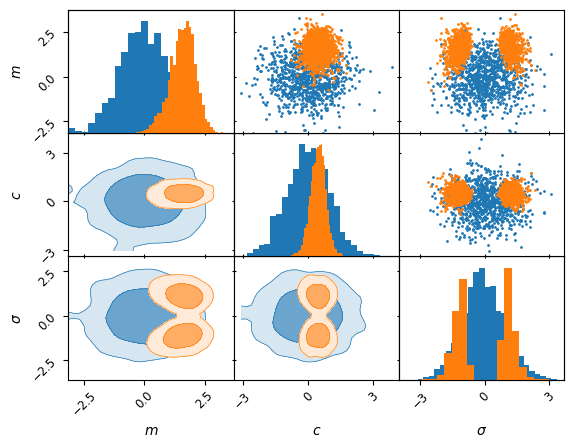

In [48]:
kinds ={'lower': 'kde_2d', 'diagonal': 'hist_1d', 'upper': 'scatter_2d'}
axes = samples.prior().plot_2d(['m', 'c', 'sigma'], kinds=kinds, label='prior')
samples.plot_2d(axes, kinds=kinds, label='posterior');

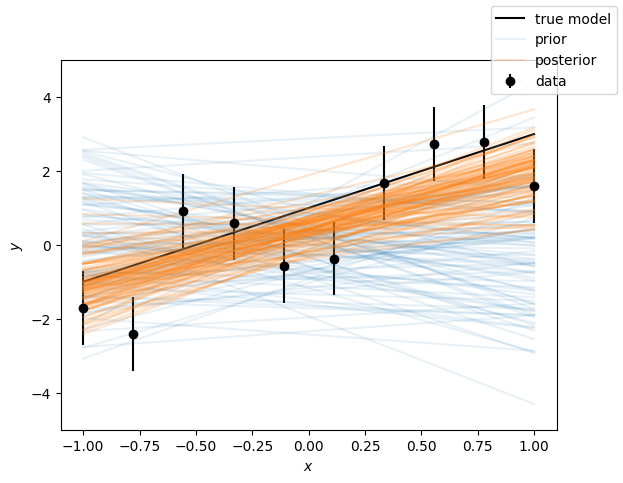

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the data
ax.errorbar(x, y, yerr=sigma, fmt="o", label="data", color='k')
ax.plot(x, m * x + c, label="true model", color='k');

# Get samples from the function y=mx+c
m_ = samples.m.values[:, None]
c_ = samples.c.values[:, None]
y_ = m_ * x  + c_
yvals = [f'y_{i}' for i in range(num_data)]
samples[yvals] = y_

# Plot the prior and posterior function samples
lines = ax.plot(x, samples.prior()[yvals].sample(100).T, color="C0", alpha=0.1)
lines[0].set_label("prior")
lines = ax.plot(x, samples[yvals].sample(100).T, color="C1", alpha=0.2)
lines[0].set_label("posterior")

# tidy up
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_ylim(-5, 5)
fig.legend();

### Structured priors & probabilitstic programming

In [50]:
import distrax
import jax.numpy as jnp

m_prior = distrax.Normal(loc=0.0, scale=2.0)
c_prior = distrax.Beta(alpha=2.0, beta=2.0)
sigma_prior = distrax.Transformed(
    distrax.Normal(loc=0.0, scale=1.0), distrax.Lambda(lambda x: jnp.exp(x))
)

prior = distrax.Joint({"m": m_prior, "c": c_prior, "sigma": sigma_prior})
rng_key, prior_key = jax.random.split(rng_key)
particles = prior.sample(seed=prior_key, sample_shape=(num_live,))

In [51]:
print(f"Particle structure: {particles.keys()}")
print(f"Shape of each parameter: {particles['m'].shape}")
print(f"First few samples of 'm': {particles['m'][:3]}")

Particle structure: dict_keys(['c', 'm', 'sigma'])
Shape of each parameter: (1000,)
First few samples of 'm': [-0.0908319   1.06374878  0.20934257]


In [52]:
! pip show jax

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Name: jax
Version: 0.4.38
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/jax-ml/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /Users/camelot/Desktop/MASt_Project/.venv_proj/lib/python3.10/site-packages
Requires: jaxlib, ml_dtypes, numpy, opt_einsum, scipy
Required-by: blackjax, chex, distrax, flax, jaxopt, optax, orbax-checkpoint


In [53]:
nested_sampler = blackjax.nss(
    logprior_fn=prior.log_prob,
    loglikelihood_fn=loglikelihood_fn,
    num_delete=num_delete,
    num_inner_steps=num_inner_steps,
)
init_fn = jax.jit(nested_sampler.init)
step_fn = jax.jit(nested_sampler.step)

live = init_fn(particles)
dead = []
with tqdm.tqdm(desc="Dead points", unit=" dead points") as pbar:
    while not live.logZ_live - live.logZ < -3:
        rng_key, subkey = jax.random.split(rng_key, 2)
        live, dead_info = step_fn(subkey, live)
        dead.append(dead_info)
        pbar.update(num_delete)

dead = blackjax.ns.utils.finalise(live, dead)

AttributeError: module 'jax.experimental' has no attribute 'pjit'

In [ ]:
! pip install --upgrade distrax

In [ ]:
import flax.linen as nn
import optax


class MLP(nn.Module):
    features: int
    num_bijector_params: int

    @nn.compact
    def __call__(self, x):
        x = nn.Dense(64)(x)
        x = nn.relu(x)
        x = nn.Dense(64)(x)
        x = nn.relu(x)
        # Initialize to zero for identity function
        x = nn.Dense(
            self.features * self.num_bijector_params,
            kernel_init=nn.initializers.zeros,
            bias_init=nn.initializers.zeros,
        )(x)
        return x.reshape(x.shape[:-1] + (self.features, self.num_bijector_params))


def make_flow_model(params_list, event_size: int):
    """Creates coupling flow model with multiple parameter blocks"""
    # Alternating binary mask
    mask = jnp.arange(event_size) % 2 == 0
    
    def bijector_fn(params):
        # Simple affine transformation
        shift, log_scale = jnp.split(params, 2, axis=-1)
        log_scale = jnp.tanh(log_scale)  # Bound log_scale
        return distrax.ScalarAffine(shift=shift[..., 0], log_scale=log_scale[..., 0])
    
    mlp = MLP(features=event_size, num_bijector_params=2)
    
    layers = []
    for p in params_list:
        def conditioner_fn(x, p=p):
            return mlp.apply(p, x)

        layer = distrax.MaskedCoupling(
            mask=mask,
            bijector=bijector_fn,
            conditioner=conditioner_fn
        )
        layers.append(layer)
        mask = ~mask  # Flip mask

    flow = distrax.Inverse(distrax.Chain(layers))
    base = distrax.MultivariateNormalDiag(
        loc=jnp.zeros(event_size), 
        scale_diag=jnp.ones(event_size)
    )
    
    return distrax.Transformed(base, flow)

In [ ]:
from blackjax.ns.utils import log_weights
rng, weight_key = jax.random.split(rng_key)
log_w = log_weights(weight_key, dead).mean(axis=-1)

# Get the ravel function for one particle
sample_tree = {k: v[0] for k, v in dead.particles.items()}
_, unravel_fn = jax.flatten_util.ravel_pytree(sample_tree)

# Convert all samples directly - just stack the arrays in the same order as ravel_pytree
flat_leaves, _ = jax.tree_util.tree_flatten(dead.particles)
N_samples = flat_leaves[0].shape[0]
posterior_samples = jnp.column_stack(flat_leaves)  # (N, 3) array

In [ ]:
num_bijections = 4
rng, *init_keys = jax.random.split(rng, num_bijections + 1)
mlp = MLP(features=num_dims, num_bijector_params=2)
params_list = [mlp.init(k, jnp.zeros((1, num_dims))) for k in init_keys]

optimizer = optax.adam(1e-3)
opt_state = optimizer.init(params_list)

def loss_fn(params_list, batch):
    model = make_flow_model(params_list, event_size=num_dims)
    return -jnp.mean(model.log_prob(batch))

@jax.jit
def train_step(params_list, opt_state, batch):
    loss, grads = jax.value_and_grad(loss_fn)(params_list, batch)
    updates, opt_state = optimizer.update(grads, opt_state)
    params_list = optax.apply_updates(params_list, updates)
    return params_list, opt_state, loss

batch_size = min(256, N_samples)
num_steps = 3000

print("Training flow...")
for step in range(num_steps):
    rng, batch_key = jax.random.split(rng)
    # weights = jnp.exp(log_w - jnp.max(log_w))
    idx = jax.random.choice(batch_key, a=N_samples, shape=(batch_size,), replace=False, p=jnp.exp(log_w))
    batch = posterior_samples[idx]
    params_list, opt_state, loss = train_step(params_list, opt_state, batch)

    if step % 500 == 0:
        print(f"Step {step}: loss = {loss:.4f}")

Training flow...
Step 0: loss = 6.0889
Step 500: loss = 1.9034
Step 1000: loss = 2.0164
Step 1500: loss = 1.9488
Step 2000: loss = 1.7943
Step 2500: loss = 1.8132


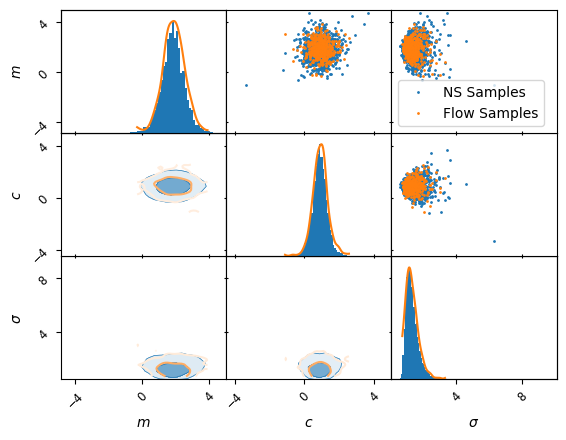

In [ ]:
from anesthetic import MCMCSamples

rng, sample_key = jax.random.split(rng)
model = make_flow_model(params_list, event_size=num_dims)
flow_samples = model.sample(seed=sample_key, sample_shape=(500,))

# Convert flow samples back to dict structure using unravel_fn
flow_samples_dict = jax.vmap(unravel_fn)(flow_samples)

kinds ={'lower': 'kde_2d', 'diagonal': 'hist_1d', 'upper': "scatter_2d"}

a = NestedSamples(
    dead.particles,
    logL=dead.loglikelihood,
    logL_birth=dead.loglikelihood_birth,
    labels=labels,
).plot_2d(list(labels.keys()),kinds=kinds,label="NS Samples")

kinds ={'lower': 'kde_2d', 'diagonal': 'kde_1d', 'upper': "scatter_2d"}

MCMCSamples(
    flow_samples_dict,
    labels=labels,
).plot_2d(a,kinds = kinds, lower_kwargs={"fc": None}, label="Flow Samples");
plt.legend();